Delta-X Workshop

Total Suspended Solids:
https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1991

Fichot, C.G., N. Ghosh, J. Harringmeyer, and M. Weiser. 2021. Delta-X: Total Suspended Solids Concentration across MRD, LA, USA, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1991

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import rasterio
import rasterio.plot

field_path = os.getcwd()

basemap = rasterio.open(field_path + '/basemap.tif')

In [15]:
##PC
TSS_file = pd.read_csv(field_path + "\DeltaX_TSS_Concentration_1991\data\DeltaX_TotalSuspSolids_Spring2021.csv")
##MAC 
#TSS_file = pd.read_csv(field_path + "/DeltaX_TSS_Concentration_1991/data/DeltaX_TotalSuspSolids_Spring2021.csv")

TSS_file = TSS_file.replace('not_collected',np.nan)
TSS_file = TSS_file.astype({'tss_concentration ':'float','depth':'float'})
TSS_file.head()

,basin,site_id,campaign,latitude,longitude,date,time,depth,tss_concentration,standard_deviation_of_tss_concentration
0,Terrebonne,TB_0405_D1,Spring 2021,29.262435,-90.935865,4/5/21,20:34,0.5,NaN,NaN
1,Terrebonne,TB_0405_S1,Spring 2021,29.343312,-90.885895,4/5/21,15:30,0.5,18.1,1
2,Terrebonne,TB_0405_S2,Spring 2021,29.258782,-90.928929,4/5/21,17:15,0.5,48.7,2.4
3,Terrebonne,TB_0405_S3,Spring 2021,29.133525,-90.833530,4/5/21,18:15,0.5,28.5,5.2
4,Terrebonne,TB_0405_S4,Spring 2021,29.170795,-90.825446,4/5/21,19:18,0.5,25.6,0.9


In [18]:
TSS_means = TSS_file.groupby(['basin'])['tss_concentration '].agg(np.nanmean)
TSS_stds = TSS_file.groupby(['basin'])['tss_concentration '].agg(np.std)
TSS_count = TSS_file.groupby(['basin'])['tss_concentration '].agg(np.count_nonzero)
TSS_means

basin
Atchafalaya    80.863636
Terrebonne     42.360784
Name: tss_concentration , dtype: float64

[Text(0.5, 0, 'Site'),
 Text(0, 0.5, 'Total suspended solics (mg/L)'),
 (0.0, 100.0)]

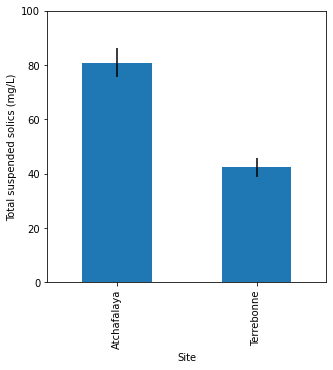

In [27]:
fig, ax1 = plt.subplots(ncols=1,nrows=1, figsize=(5,5))
TSS_means.plot(kind='bar', stacked=False,ax = ax1,yerr = TSS_stds/(np.sqrt(TSS_count)))
ax1.set(xlabel='Site', ylabel='Total suspended solics (mg/L)',ylim=[0,100])


<AxesSubplot:>

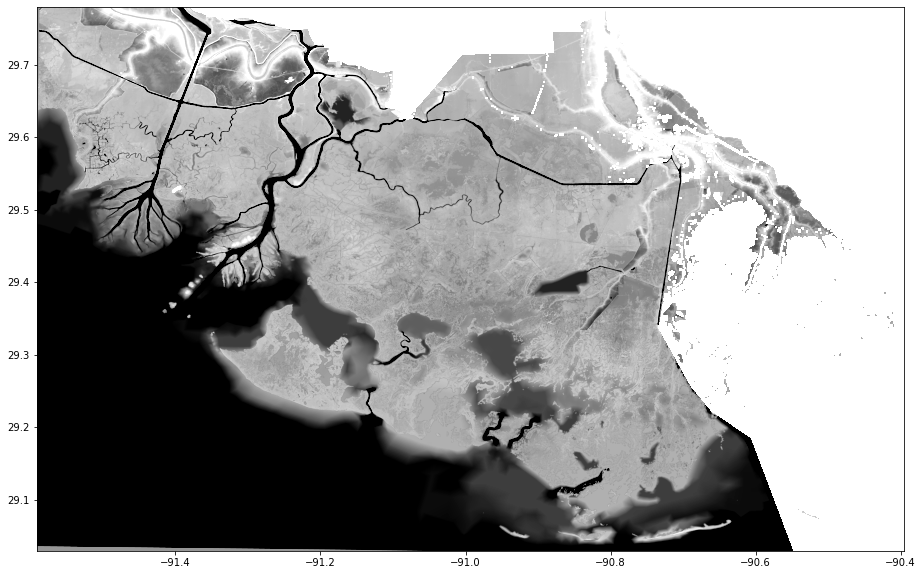

In [56]:
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(basemap,vmin=-2,vmax=2,transform=basemap.transform,ax=ax,cmap='Greys_r')
    
TSS_file.plot(x="longitude", y="latitude", ax=ax,kind="scatter", c="tss_concentration ",
        colormap="YlOrRd")